In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [32]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [34]:
df.isnull().mean() *100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [35]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 0)

In [37]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [38]:
X_train.isnull().mean()

Age       0.198034
Fare      0.054775
Family    0.000000
dtype: float64

In [39]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [40]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [41]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
307,17.0,108.9000,1,17.0,17.0,108.9000,108.9000
105,28.0,7.8958,0,28.0,28.0,7.8958,7.8958
597,49.0,0.0000,0,49.0,49.0,0.0000,0.0000
189,36.0,7.8958,0,36.0,36.0,7.8958,7.8958
875,15.0,7.2250,0,15.0,15.0,7.2250,7.2250


In [42]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  213.7165085187578
Age Variance after median imputation:  171.42222438960798
Age Variance after mean imputation:  171.33390978297038
Original Fare variable variance:  2574.3526206637193
Fare Variance after median imputation:  2448.897024777755
Fare Variance after mean imputation:  2433.143405184275


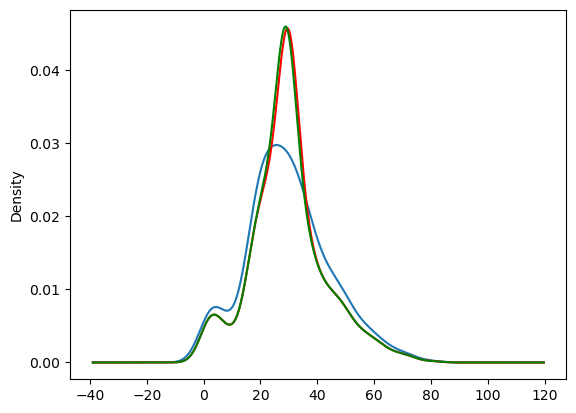

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde' , ax = ax)
X_train['Age_mean'].plot(kind = 'kde' , color = 'red' , ax  = ax)
X_train['Age_median'].plot(kind = 'kde' , color = 'green')
plt.show()



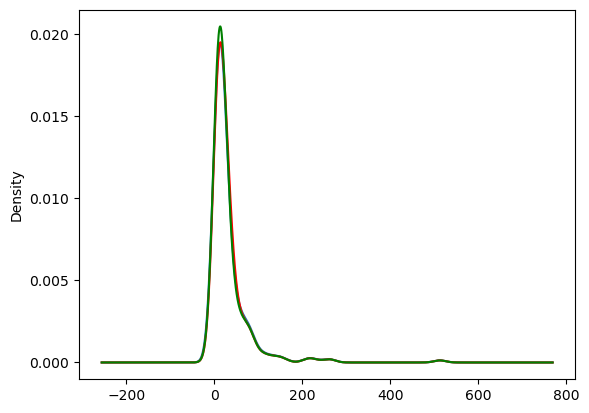

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde' , ax = ax)
X_train['Fare_mean'].plot(kind = 'kde' , color = 'red' , ax  = ax)
X_train['Fare_median'].plot(kind = 'kde' , color = 'green')
plt.show()



In [46]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,213.716509,84.480223,-6.393469,213.716509,213.716509,79.571049,79.420930
Fare,84.480223,2574.352621,17.050423,67.493301,68.754981,2574.352621,2574.352621
Family,-6.393469,17.050423,2.770177,-5.125566,-5.121468,16.115167,16.285129
Age_mean,213.716509,67.493301,-5.125566,171.333910,171.333910,63.791137,63.670788
Age_median,213.716509,68.754981,-5.121468,171.333910,171.422224,64.983611,64.831778
Fare_mean,79.571049,2574.352621,16.115167,63.791137,64.983611,2433.143405,2433.143405
Fare_median,79.420930,2574.352621,16.285129,63.670788,64.831778,2433.143405,2448.897025


In [47]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.103929,0.103346
Fare,0.106334,1.000000,0.198661,0.101058,0.102921,1.000000,1.000000
Family,-0.295318,0.198661,1.000000,-0.235270,-0.235021,0.196290,0.197721
Age_mean,1.000000,0.101058,-0.235270,1.000000,0.999742,0.098800,0.098295
Age_median,1.000000,0.102921,-0.235021,0.999742,1.000000,0.100620,0.100062
Fare_mean,0.103929,1.000000,0.196290,0.098800,0.100620,1.000000,0.996778
Fare_median,0.103346,1.000000,0.197721,0.098295,0.100062,0.996778,1.000000


<Axes: >

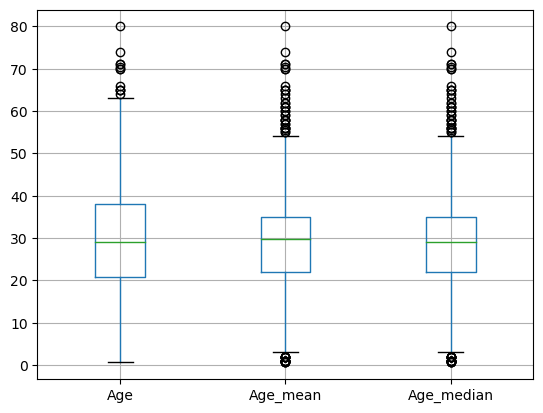

In [48]:
X_train[['Age' , 'Age_mean' , 'Age_median']].boxplot()

<Axes: >

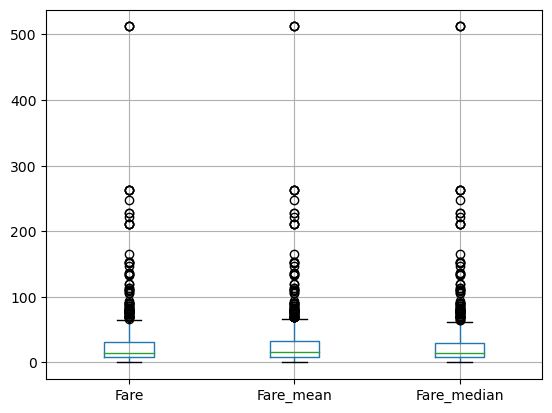

In [49]:
X_train[['Fare' , 'Fare_mean' , 'Fare_median']].boxplot()

In [50]:
X_train['Fare'].describe()

count    673.000000
mean      31.885314
std       50.738079
min        0.000000
25%        7.925000
50%       14.454200
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 0)

In [56]:
trf = ColumnTransformer([
    ('impute1' , SimpleImputer(strategy = 'median') , ['Age']),
    ('impute2' , SimpleImputer(strategy = 'mean') , ['Fare'])
] , remainder = 'passthrough')

In [57]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [58]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [59]:
X_train

array([[29.    , 15.2458,  2.    ],
       [31.    , 10.5   ,  0.    ],
       [31.    , 37.0042,  2.    ],
       ...,
       [29.    ,  7.7333,  0.    ],
       [36.    , 17.4   ,  1.    ],
       [60.    , 39.    ,  2.    ]])